# Exercice 1

#### Ecrire une fonction def Empiler_Fat(n, P1) permettant d'empiler tous les apples de la fonction factorielle jusqu'à n dans une pile P1. La fonction retourne P1

In [42]:
def Empiler_Fat(n:int, P1:list) -> list:
  def factorial(n):
    if n == 0 or n == 1:
      return 1
    else:
      return n * factorial(n - 1)
  
  for i in range(1, n + 1):
    P1.append(factorial(i))
  
  return P1

# Example usage
P1 = []
n = 5
P1 = Empiler_Fat(n, P1)
print(P1)

[1, 2, 6, 24, 120]


#### Ecrire une fonction def Empiler_Puiss(n,x,P2) permettant d'empiler tous les appels de la fonction puiss jusqu'à n dans une pile P2. La fonction retourne P2.

In [43]:
def Empiler_Puiss(x:int, n:int, P2:list) -> list:
  def puiss(n, x):
    return x ** n
  
  for i in range(1, n + 1):
    P2.append(puiss(i, x))
  
  return P2

# Example usage
P2 = []
x = 2
P2 = Empiler_Puiss(x,n, P2)
print(P2)

[2, 4, 8, 16, 32]


#### Ecrire une fonction def Empiler_Frac(P1 , P2) qui permet de construire la pile P3 à partir de de la pile 1 et la pile 2 en empilant la fraction Xi /i!

In [44]:
def Empiler_Frac(P1:list, P2:list) -> list:
  P3 = []
  for i in range(len(P1)):
    P3.append(P2[i] / P1[i])
  return P3

# Example usage
P3 = Empiler_Frac(P1, P2)
print(P3)

[2.0, 2.0, 1.3333333333333333, 0.6666666666666666, 0.26666666666666666]


#### Ecrire une fonction def Somme(n ,x) qui retourne la somme S.

In [45]:
def Somme(n: int, x: int) -> float:
  P1 = Empiler_Fat(n, [])
  P2 = Empiler_Puiss(x, n, [])
  P3 = Empiler_Frac(P1, P2)
  return sum(P3)

# Example usage
S = Somme(n, x)
print(S)

6.266666666666667


# Exercice 2

In [46]:
def evaluate_rpn(expression: str) -> float:
  stack = []
  tokens = expression.split()
  
  for token in tokens:
    if token.isdigit():
      stack.append(float(token))
    else:
      b = stack.pop()
      a = stack.pop()
      if token == '+':
        stack.append(a + b)
      elif token == '-':
        stack.append(a - b)
      elif token == '*':
        stack.append(a * b)
      elif token == '/':
        stack.append(a / b)
  
  return stack[0]

# Example usage
expressions = ["17 10 -", "3 28 7 / +", "3 28 + 7 /"]
results = [evaluate_rpn(expr) for expr in expressions]
print(results)

# Classical notation
classical_notations = ["17 - 10", "3 + (28 / 7)", "(3 + 28) / 7"]
print(classical_notations)

[7.0, 7.0, 4.428571428571429]
['17 - 10', '3 + (28 / 7)', '(3 + 28) / 7']


#### Question 2. Traduire en notation polonaise inversée les expressions suivantes :
(19 * 6) – 7 et (4 - 2 * (7 + 6)) + 3 * 5

In [47]:
# Translated expressions in RPN
rpn_expressions = ["19 6 * 7 -", "4 2 7 6 + * - 3 5 * +"]

# Print the RPN expressions
print(rpn_expressions)

['19 6 * 7 -', '4 2 7 6 + * - 3 5 * +']


#### Question 3. Ecrire les primitives nécessaires de gestion d'une pile sous forme d'une liste:
PileVide, EstVide, Empiler, Depiler, et SommetPile

In [48]:
def PileVide() -> list:
  """Create an empty stack."""
  return []

def EstVide(pile: list) -> bool:
  """Check if the stack is empty."""
  return len(pile) == 0

def Empiler(pile: list, element) -> None:
  """Push an element onto the stack."""
  pile.append(element)

def Depiler(pile: list):
  """Pop an element from the stack."""
  if EstVide(pile):
    raise IndexError("Depiler from an empty stack")
  return pile.pop()

def SommetPile(pile: list):
  """Get the top element of the stack without removing it."""
  if EstVide(pile):
    raise IndexError("SommetPile from an empty stack")
  return pile[-1]

# Example usage
stack = PileVide()
Empiler(stack, 10)
Empiler(stack, 20)
print("Stack after pushing 10 and 20:", stack)
print("Top element:", SommetPile(stack))
print("Popped element:", Depiler(stack))
print("Stack after popping:", stack)
print("Is stack empty?", EstVide(stack))

Stack after pushing 10 and 20: [10, 20]
Top element: 20
Popped element: 20
Stack after popping: [10]
Is stack empty? False


#### Question 4. Écrire une fonction d'entête: def EstChiffre(c) qui renvoie 1 si le caractère passé
en paramètre est un chiffre et 0 sinon. (Rappeler bien que les chiffre 0,1,...9 sont aussi des
caractères)
Par exemple : EstChiffre('+')=0 et EstChiffre('4')=1

In [49]:
def EstChiffre(c: str) -> int:
  if c.isdigit():
    return 1
  else:
    return 0

# Example usage
print(EstChiffre('+'))  # Output: 0
print(EstChiffre('4'))  # Output: 1

0
1


#### Question 5. Écrire une fonction d'entête: def Convertir(c) qui permet de convertir un
caractère qui représente un chiffre en entier.

Par exemple : Convertir('2')=2; et Convertir('0')=0

In [50]:
def Convertir(c: str) -> int:
  return int(c)

# Example usage
print(Convertir('2'))  # Output: 2

2


#### Question 6. Écrire une fonction d'entête: def Evaluer(expression) qui qui évalue une
expression polonaise inversée, composée d'entiers entre 0 et 9 et des quatre opérations
élémentaires

In [51]:
def Evaluer(expression: str) -> int:
  stack = []
  tokens = expression.split()
  
  for token in tokens:
    if token.isdigit():
      stack.append(int(token))
    else:
      b = stack.pop()
      a = stack.pop()
      if token == '+':
        stack.append(a + b)
      elif token == '-':
        stack.append(a - b)
      elif token == '*':
        stack.append(a * b)
      elif token == '/':
        stack.append(a // b)  # Use integer division for consistency with the problem statement
  
  return stack[0]

# Example usage
example_expression = "3 4 + 2 * 7 /"
result = Evaluer(example_expression)
print(result)  # Output: 2

2


#### Question 7. :Écrire une fonction d'entête: def EvaluerTexte(Fsrc, Fdest) qui permet
d'évaluer le contenu du fichier source src ensuite stocker le resulat de chaque calcul dans le fichier
destination dest)

In [52]:
def EvaluerTexte(Fsrc: str, Fdest: str) -> None:
  with open(Fsrc, 'r') as src_file:
    expressions = src_file.readlines()
  
  results = [Evaluer(expr.strip()) for expr in expressions]
  
  with open(Fdest, 'w') as dest_file:
    for result in results:
      dest_file.write(f"{result}\n")

# Example usage
Fsrc = './source.txt'
Fdest = './destination.txt'
EvaluerTexte(Fsrc, Fdest)

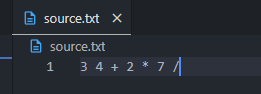
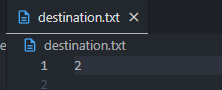

# Exercice 3
On désire maintenant introduire une notion de priorité dans la file d'attente. La priorité est codé par un nombre entier positif, 0 étant le moins prioritaire. Lorsque l'on retire un élément de la queue, on veut obtenir le plus ancien avec la priorité la plus haute. Lors du dépot d'un élément on indique sa priorité: 
def deposer_dans_queue(file, element,priorite );
1-Définir la structure de données adéquate pour gérer la file avec priorités.
2-Ecrire les fonctions de dépot et de retrait

In [53]:
def deposer_dans_queue(file: list, element, priorite: int) -> None:
  file.append((element, priorite))
  file.sort(key=lambda x: x[1], reverse=True)

def retirer_de_queue(file: list):
  if not file:
    raise IndexError("retirer_de_queue from an empty queue")
  return file.pop(0)

# Example usage
file = []
deposer_dans_queue(file, 'tâche1', 2)
deposer_dans_queue(file, 'tâche2', 3)
deposer_dans_queue(file, 'tâche3', 1)

print("Queue apres insertion:", file)

element = retirer_de_queue(file)
print("Element retiré:", element)
print("Queue apres retrait:", file)


Queue apres insertion: [('tâche2', 3), ('tâche1', 2), ('tâche3', 1)]
Element retiré: ('tâche2', 3)
Queue apres retrait: [('tâche1', 2), ('tâche3', 1)]


## Exercice 4
Dans une gare, un guichet est ouvert. Les clients arrivent à des dates aléatoires et rentrent dans une queue. L’intervalle entre l’arrivée de deux clients successifs est un nombre aléatoire entre 0 et INTERVALLE_MAX (les dates sont des entiers indiquant des secondes). Lorsque le guichetier a fini de traiter un client, il appelle le client suivant dont le traitement va avoir une durée aléatoire entre 0 et DUREE_TRAITEMENT_MAX.

#### a) Définir les structures de données pour l’algorithme de simulation.
#### b) Écrire une fonction CreerListeClients, qui crée une file de clients, le nombre de clients étant saisi au clavier. Cette fonction initialise aussi la date d’arrivée et la durée d’attente de chacun des clients. On supposera que le premier client est arrivé à 8h.
#### c)Écrire une fonction d’affichage qui affiche le numéro de chacun des clients, sa date d’arrivée et sa date de fin de traitement en format (h min sec).

In [54]:
import random
from datetime import timedelta
# Constants
INTERVALLE_MAX = 10  # Maximum interval between arrivals in seconds
DUREE_TRAITEMENT_MAX = 5  # Maximum processing time in seconds

# Function to create a list of clients
def CreerListeClients(num_clients: int) -> list:
  clients = []
  current_time = 8 * 3600  # Start time at 8:00 AM in seconds
  for i in range(num_clients):
    arrival_time = current_time + random.randint(0, INTERVALLE_MAX)
    processing_time = random.randint(0, DUREE_TRAITEMENT_MAX)
    client = {
      'client_id': i + 1,
      'arrival_time': arrival_time,
      'processing_time': processing_time
    }
    clients.append(client)
    current_time = arrival_time
  return clients

def AfficherClients(clients: list) -> None:
  for client in clients:
    arrival_time = timedelta(seconds=client['arrival_time'])
    end_time = timedelta(seconds=client['arrival_time'] + client['processing_time'])
    arrival_str = str(arrival_time)
    end_str = str(end_time)
    print(f"Client {client['client_id']}: Arrival Time = {arrival_str}, End Time = {end_str}")

# Example usage
num_clients = 5
clients = CreerListeClients(num_clients)
AfficherClients(clients)


Client 1: Arrival Time = 8:00:07, End Time = 8:00:11
Client 2: Arrival Time = 8:00:09, End Time = 8:00:09
Client 3: Arrival Time = 8:00:14, End Time = 8:00:18
Client 4: Arrival Time = 8:00:19, End Time = 8:00:24
Client 5: Arrival Time = 8:00:23, End Time = 8:00:26


# Exercice 5

#### Créer une fonction Python permettant d’importer le fichier dans une table. La table renvoyée est une liste de dictionnaires Python.

In [55]:
import csv

def importer_fichier_dans_table(filepath: str) -> list:
  table = []
  with open(filepath, mode='r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
      table.append(dict(row))
  return table

# Example usage
filepath = './utilisateurs.csv'
utilisateurTable = importer_fichier_dans_table(filepath)
print(utilisateurTable)

[{'nom': 'Morgan', 'genre': 'M', 'score_1': '199', 'score_2': '352', 'email': 'momo@example.com'}, {'nom': 'Celia', 'genre': 'F', 'score_1': '993', 'score_2': '239', 'email': 'celiadupont@example.com'}, {'nom': 'Mehdi', 'genre': 'M', 'score_1': '234', 'score_2': '876', 'email': 'bossDeLoctogone@rapgame.fr'}, {'nom': 'John', 'genre': 'M', 'score_1': '1452', 'score_2': '86', 'email': 'jonny@example.com'}, {'nom': 'Axelle', 'genre': 'F', 'score_1': '290', 'score_2': '222', 'email': 'ax59@ici.com'}, {'nom': 'Sonia', 'genre': 'F', 'score_1': '1987', 'score_2': '965', 'email': 'soso@example.com'}, {'nom': 'Sabina', 'genre': 'F', 'score_1': '197', 'score_2': '25', 'email': 'booba@example.com'}, {'nom': 'Thibault', 'genre': 'F', 'score_1': '1987', 'score_2': '765', 'email': 'thiball@goog.com'}, {'nom': 'Louis', 'genre': 'M', 'score_1': '223', 'score_2': '65', 'email': 'lmax@example.com'}, {'nom': 'Lena', 'genre': 'F', 'score_1': '1987', 'score_2': '765', 'email': 'leterminator@caramail.com'}, 

#### 2. Sélectionner
Pour toutes les sélections à effectuer, on partira de la table crée à la question précédente.
On donnera une fonction Python par question (pouvant appeler d’autres fonctions).
1. Créer la table des enregistrements des joueurs ayant moins de 300 points au premier
jeu.
2. Créer la table des enregistrements des filles.
3. Créer la table des enregistrements des utilisateurs dont l’adresse mail fait partie du
domaine @example.fr

In [56]:
def joueurs_moins_de_300_points(table: list) -> list:
  return [record for record in table if int(record['score_1']) < 300]

def enregistrements_filles(table: list) -> list:
  return [record for record in table if record['genre'] == 'F']

def utilisateurs_domaine_example_fr(table: list) -> list:
  return [record for record in table if record['email'].endswith('@example.fr')]

# Example usage
joueurs_moins_300 = joueurs_moins_de_300_points(utilisateurTable)
filles = enregistrements_filles(utilisateurTable)
utilisateurs_example_fr = utilisateurs_domaine_example_fr(utilisateurTable)

print("Joueurs ayant moins de 300 points au premier jeu:", joueurs_moins_300)
print("Enregistrements des filles:", filles)
print("Utilisateurs avec email @example.fr:", utilisateurs_example_fr)

Joueurs ayant moins de 300 points au premier jeu: [{'nom': 'Morgan', 'genre': 'M', 'score_1': '199', 'score_2': '352', 'email': 'momo@example.com'}, {'nom': 'Mehdi', 'genre': 'M', 'score_1': '234', 'score_2': '876', 'email': 'bossDeLoctogone@rapgame.fr'}, {'nom': 'Axelle', 'genre': 'F', 'score_1': '290', 'score_2': '222', 'email': 'ax59@ici.com'}, {'nom': 'Sabina', 'genre': 'F', 'score_1': '197', 'score_2': '25', 'email': 'booba@example.com'}, {'nom': 'Louis', 'genre': 'M', 'score_1': '223', 'score_2': '65', 'email': 'lmax@example.com'}, {'nom': 'Sandra', 'genre': 'F', 'score_1': '197', 'score_2': '259', 'email': 'temointemoin@example.com'}, {'nom': 'Irena', 'genre': 'F', 'score_1': '17', 'score_2': '893', 'email': 'nena@example.com'}]
Enregistrements des filles: [{'nom': 'Celia', 'genre': 'F', 'score_1': '993', 'score_2': '239', 'email': 'celiadupont@example.com'}, {'nom': 'Axelle', 'genre': 'F', 'score_1': '290', 'score_2': '222', 'email': 'ax59@ici.com'}, {'nom': 'Sonia', 'genre': '

#### 3. Projecter
Pour chaque projection on créera une fonction qui retourne une table.
Celle-ci sera toujours une liste de dictionnaires, comme précédemment.
1. Meilleurs scores
a. Créer les projections des meilleurs scores pour chaque jeu.
b. Utiliser cette fonction pour créer la liste des meilleurs scores pour chaque jeu,
triées par score croissant.
c. Calculer le score moyen de chaque jeu.
2. Adresses mail.
a. Créer la projection des adresses mail. Le résultat attendu est la liste de toutes
les adresses des joueurs.
b. Recommencer en ne conservant que les 10 joueurs ayant le plus mauvais score
pour chaque jeu.
c. Enfin, effacer les doublons.

In [57]:
def projection_meilleurs_scores(table: list) -> list:
  return [{'nom': record['nom'], 'score_1': int(record['score_1']), 'score_2': int(record['score_2'])} for record in table]

def trier_par_score_croissant(projection: list) -> list:
  return sorted(projection, key=lambda x: (x['score_1'], x['score_2']))

def calculer_score_moyen(projection: list) -> dict:
  total_score_1 = sum(record['score_1'] for record in projection)
  total_score_2 = sum(record['score_2'] for record in projection)
  return {
    'score_1_moyen': total_score_1 / len(projection),
    'score_2_moyen': total_score_2 / len(projection)
  }

def projection_adresses_mail(table: list) -> list:
  return [record['email'] for record in table]

def projection_mauvais_scores(table: list) -> list:
  projection = projection_meilleurs_scores(table)
  projection_sorted = sorted(projection, key=lambda x: (x['score_1'], x['score_2']))
  return projection_sorted[:10]

def effacer_doublons(liste: list) -> list:
  return list(set(liste))

# Example usage
meilleurs_scores = projection_meilleurs_scores(utilisateurTable)
meilleurs_scores_tries = trier_par_score_croissant(meilleurs_scores)
scores_moyens = calculer_score_moyen(meilleurs_scores)
adresses_mail = projection_adresses_mail(utilisateurTable)
mauvais_scores = projection_mauvais_scores(utilisateurTable)
adresses_mail_sans_doublons = effacer_doublons(adresses_mail)

print("Meilleurs scores:", meilleurs_scores)
print("Meilleurs scores triés:", meilleurs_scores_tries)
print("Scores moyens:", scores_moyens)
print("Adresses mail:", adresses_mail)
print("Mauvais scores:", mauvais_scores)
print("Adresses mail sans doublons:", adresses_mail_sans_doublons)

Meilleurs scores: [{'nom': 'Morgan', 'score_1': 199, 'score_2': 352}, {'nom': 'Celia', 'score_1': 993, 'score_2': 239}, {'nom': 'Mehdi', 'score_1': 234, 'score_2': 876}, {'nom': 'John', 'score_1': 1452, 'score_2': 86}, {'nom': 'Axelle', 'score_1': 290, 'score_2': 222}, {'nom': 'Sonia', 'score_1': 1987, 'score_2': 965}, {'nom': 'Sabina', 'score_1': 197, 'score_2': 25}, {'nom': 'Thibault', 'score_1': 1987, 'score_2': 765}, {'nom': 'Louis', 'score_1': 223, 'score_2': 65}, {'nom': 'Lena', 'score_1': 1987, 'score_2': 765}, {'nom': 'Luka', 'score_1': 977, 'score_2': 535}, {'nom': 'Sandra', 'score_1': 197, 'score_2': 259}, {'nom': 'Irena', 'score_1': 17, 'score_2': 893}]
Meilleurs scores triés: [{'nom': 'Irena', 'score_1': 17, 'score_2': 893}, {'nom': 'Sabina', 'score_1': 197, 'score_2': 25}, {'nom': 'Sandra', 'score_1': 197, 'score_2': 259}, {'nom': 'Morgan', 'score_1': 199, 'score_2': 352}, {'nom': 'Louis', 'score_1': 223, 'score_2': 65}, {'nom': 'Mehdi', 'score_1': 234, 'score_2': 876}, {'